In [180]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('prep_pacifier.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,avg_rating,1,2,3,4,5,period
0,4.500000,0.0,1.0,0.0,1.0,6.0,159.0
1,4.555556,0.0,1.0,0.0,0.0,7.0,117.0
2,4.600000,0.0,1.0,0.0,0.0,7.0,134.0
3,4.636364,0.0,1.0,0.0,0.0,7.0,147.0
4,4.666667,0.0,1.0,0.0,0.0,7.0,143.0


In [133]:
df = df.dropna()

In [134]:
y_val= df['period']
x_data=df.drop("period",axis=1)

X_train, X_eval,y_train,y_eval=train_test_split(x_data,y_val,test_size=0.3,random_state=42)

In [135]:
scaler_model = MinMaxScaler()
scaler_model.fit(X_train)

X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

scaler_model.fit(X_eval)
X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)

In [136]:
#Creating Feature Columns
feat_cols=[]
for cols in df.columns[:-1]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
print(feat_cols)

[NumericColumn(key='avg_rating', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [137]:
#The estimator model
model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

#the input function
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)
#input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/py/yb3gbh695135q_y1lqb0c9h80000gn/T/tmp9tv27yom', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [138]:
#Training the model
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/py/yb3gbh695135q_y1lqb0c9h80000gn/T/tmp9tv27yom/model.ckpt.
INFO:tensorflow:loss = 32970.94, step = 0
INFO:tensorflow:global_step/sec: 472.076
INFO:tensorflow:loss = 42663.156, step = 100 (0.212 sec)
INFO:tensorf

In [139]:
#Evaluating the model
train_metrics=model.evaluate(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-08T22:34:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/py/yb3gbh695135q_y1lqb0c9h80000gn/T/tmp9tv27yom/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evalua

In [30]:
#Now to predict values we do the following
pred_input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_eval,y=y_eval,batch_size=10,num_epochs=1,shuffle=False)
preds=model.predict(input_fn=pred_input_func)

predictions=list(preds)
final_pred=[]
for pred in predictions:
    final_pred.append(pred["predictions"])

INFO:tensorflow:Could not find trained model in model_dir: /var/folders/py/yb3gbh695135q_y1lqb0c9h80000gn/T/tmpnp__tl_3, running initialization to predict.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [31]:
final_pred

[array([0.00189464], dtype=float32),
 array([0.00407797], dtype=float32),
 array([0.00404337], dtype=float32),
 array([0.06544469], dtype=float32),
 array([-0.00535371], dtype=float32),
 array([-0.06650353], dtype=float32),
 array([-0.04056101], dtype=float32),
 array([0.00627348], dtype=float32),
 array([0.0015815], dtype=float32),
 array([-0.02288725], dtype=float32),
 array([0.01787888], dtype=float32),
 array([-0.0404315], dtype=float32),
 array([0.01786023], dtype=float32),
 array([0.00043119], dtype=float32),
 array([0.00461368], dtype=float32),
 array([-0.04644731], dtype=float32),
 array([0.06146606], dtype=float32),
 array([-0.00511959], dtype=float32),
 array([-6.7483634e-05], dtype=float32),
 array([0.02149328], dtype=float32),
 array([-0.00806823], dtype=float32),
 array([0.00094152], dtype=float32),
 array([-0.00279142], dtype=float32),
 array([-0.02162542], dtype=float32),
 array([0.01791086], dtype=float32),
 array([-0.00018675], dtype=float32),
 array([-0.02510321], dty

In [ ]:
#random forest
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [167]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 15)
# Train the model on training data
rf.fit(X_train, y_train);

In [168]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_eval)
# Calculate the absolute errors
errors = abs(predictions - y_eval)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 34.74 degrees.


In [169]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors /y_eval))
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 67.27 %.


In [116]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: avg_rating           Importance: 0.49
Variable: number of 1 star     Importance: 0.13
Variable: number of 5 stars    Importance: 0.13
Variable: number of 3 stars    Importance: 0.09
Variable: number of 4 stars    Importance: 0.09
Variable: number of 2 stars    Importance: 0.07


[None, None, None, None, None, None]

In [205]:
def RandomF(n_estimators,random_state):
    #random forest
    # Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators = n_estimators, random_state = random_state)
    # Train the model on training data
    rf.fit(X_train, y_train);
    # Use the forest's predict method on the test data
    predictions = rf.predict(X_eval)
    # Calculate the absolute errors
    errors = abs(predictions - y_eval)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors /y_eval))
    # Calculate and display accuracy
    accuracy = 100 - mape
    accuracy = round(accuracy,2)
    return accuracy  

In [207]:
n_est = [200*i for i in range(1,10)]
ran_state = [5*i for i in range(20)]

In [208]:
acc_13 = []
for i in n_est:
    a = RandomF(i,13)
    acc_13.append(a)

Mean Absolute Error: 34.87 degrees.
Mean Absolute Error: 34.77 degrees.
Mean Absolute Error: 34.65 degrees.
Mean Absolute Error: 34.57 degrees.
Mean Absolute Error: 34.55 degrees.
Mean Absolute Error: 34.57 degrees.
Mean Absolute Error: 34.58 degrees.
Mean Absolute Error: 34.62 degrees.
Mean Absolute Error: 34.63 degrees.


Text(0.5, 1.0, 'Accuracy with random_state=13(green) and 40(orange)')

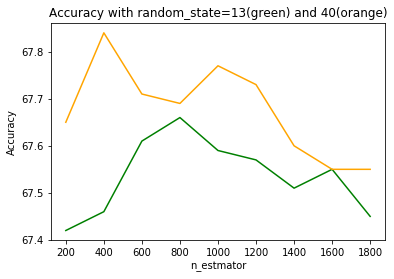

In [217]:
plt.plot(n_est,acc_13,color='g')
plt.plot(n_est,acc_40,color='orange')
plt.xlabel('n_estmator')
plt.ylabel('Accuracy')
plt.title('Accuracy with random_state=13(green) and 40(orange)')

In [212]:
acc_40 = []
for i in n_est:
    a = RandomF(i,40)
    print(a)
    acc_40.append(a)

Mean Absolute Error: 34.46 degrees.
67.65
Mean Absolute Error: 34.31 degrees.
67.84
Mean Absolute Error: 34.46 degrees.
67.71
Mean Absolute Error: 34.46 degrees.
67.69
Mean Absolute Error: 34.47 degrees.
67.77
Mean Absolute Error: 34.52 degrees.
67.73
Mean Absolute Error: 34.54 degrees.
67.6
Mean Absolute Error: 34.52 degrees.
67.55
Mean Absolute Error: 34.53 degrees.
67.55


[None, None, None, None, None, None, None, None, None, None, None, None]

In [201]:
RandomF(1000,100)

Mean Absolute Error: 34.64 degrees.
Accuracy: 67.61 %.


In [218]:
acc_1000 = []
for i in ran_state:
    a = RandomF(1000,i)
    acc_1000.append(a)

Mean Absolute Error: 34.68 degrees.
Mean Absolute Error: 34.61 degrees.
Mean Absolute Error: 34.74 degrees.
Mean Absolute Error: 34.59 degrees.
Mean Absolute Error: 34.52 degrees.
Mean Absolute Error: 34.69 degrees.
Mean Absolute Error: 34.67 degrees.
Mean Absolute Error: 34.66 degrees.
Mean Absolute Error: 34.47 degrees.
Mean Absolute Error: 34.72 degrees.
Mean Absolute Error: 34.53 degrees.
Mean Absolute Error: 34.65 degrees.
Mean Absolute Error: 34.61 degrees.
Mean Absolute Error: 34.62 degrees.
Mean Absolute Error: 34.65 degrees.
Mean Absolute Error: 34.62 degrees.
Mean Absolute Error: 34.61 degrees.
Mean Absolute Error: 34.57 degrees.
Mean Absolute Error: 34.56 degrees.
Mean Absolute Error: 34.63 degrees.


In [219]:
acc_500 = []
for i in ran_state:
    a = RandomF(500,i)
    acc_500.append(a)

Mean Absolute Error: 34.66 degrees.
Mean Absolute Error: 34.64 degrees.
Mean Absolute Error: 34.84 degrees.
Mean Absolute Error: 34.6 degrees.
Mean Absolute Error: 34.48 degrees.
Mean Absolute Error: 34.72 degrees.
Mean Absolute Error: 34.82 degrees.
Mean Absolute Error: 34.68 degrees.
Mean Absolute Error: 34.42 degrees.
Mean Absolute Error: 34.72 degrees.
Mean Absolute Error: 34.57 degrees.
Mean Absolute Error: 34.65 degrees.
Mean Absolute Error: 34.73 degrees.
Mean Absolute Error: 34.59 degrees.
Mean Absolute Error: 34.73 degrees.
Mean Absolute Error: 34.53 degrees.
Mean Absolute Error: 34.61 degrees.
Mean Absolute Error: 34.6 degrees.
Mean Absolute Error: 34.61 degrees.
Mean Absolute Error: 34.54 degrees.


Text(0.5, 1.0, 'Accuracy with n_estimator=1000(green) and 500(orange)')

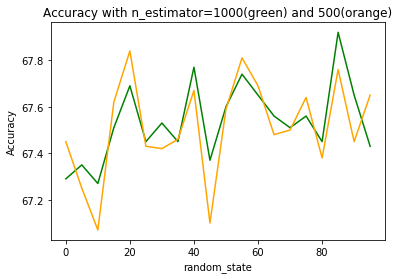

In [220]:
plt.plot(ran_state,acc_1000,color='g')
plt.plot(ran_state,acc_500,color='orange')
plt.xlabel('random_state')
plt.ylabel('Accuracy')
plt.title('Accuracy with n_estimator=1000(green) and 500(orange)')

In [54]:
print(predictions)

[ 19.607        7.18375    155.412      318.2012      69.11887381
 336.9751381  194.85417038  43.872      159.25179048 424.42625126
  41.575      182.223      177.79766667 447.72716667 133.679
  29.73       214.836      163.662      454.26595    272.85376746
 176.44788131  41.601      204.28655    325.392      159.2008
  29.046      184.19177367  11.111       31.48        24.735
 241.25139427  45.341      533.80628333 193.911       39.828
 194.85417038   5.049      350.569      277.02742511 277.02742511
  17.195       11.111       71.55825833   6.53959695  66.994
 131.627       76.492      187.1298     525.74708095   4.752
 157.173       43.111      132.39785714  42.125        8.663
  10.92206667 201.24832273 296.39173571  16.40332442  23.62301905
 238.99895238 182.223      173.32338333 281.39803333  38.765
  27.741      147.34971125  32.64       402.489      208.51666667
   7.2743      12.196      247.04666667 374.94291337  92.373
  17.195      115.392       40.16938333 166.387      2

In [56]:
print(y_eval)

556      19.0
1342      7.0
654     154.0
1231    332.0
1119     23.0
        ...  
1764     15.0
374      28.0
1417     27.0
246     101.0
574     896.0
Name: period, Length: 555, dtype: float64


In [ ]:
# The baseline predictions are the historical averages
baseline_preds = X_train[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_train)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))